## Question 1

### Proprocessing

In [107]:
import os
import gensim.models as models
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import random,numpy as np
import re, string, unicodedata
import nltk
import contractions
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.corpus import stopwords
# from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import operator, random
import sys
import math
import pickle
from nltk.stem import *
from num2words import num2words

def remove_header_footer(final_string):
	new_final_string=""
	flag=1
	tokens=final_string.split('\n\n')
	# Remove tokens[0] and tokens[-1]
	for token in tokens[1:-1]:
		flag+=1
		new_final_string+=str(token)+" "
	flag=0
	return new_final_string

def remove_html(data):
	return BeautifulSoup(data, "html.parser").get_text()

# def remove_btw_sqr(data):
#     fin = re.sub('\[[^]]*\]', '', data)
#     return fin

def fix_contractions(data):
    fin = contractions.fix(data)
    return fin

def words_tokenizer(data):
	words = nltk.word_tokenize(data)
	# tknzr = TweetTokenizer()	
	# tknzr.tokenize(data)
	return words

def remove_non_ascii(words):
	new_words = []
	flag = 0
	for i in range(len(words)):
		flag = 1
		new_word = unicodedata.normalize('NFKD',unicode(words[i]))
		new_word = new_word.encode('ascii','ignore')
		new_word = new_word.decode('utf-8','ignore')
		flag+=1
		new_words.append(new_word)
	return new_words
# def remove_non_ascii(words):
#     new_words = []
#     flag = 0
#     for i in range(len(words)):
#  		flag=1
#  		new_word = unicodedata.normalize('NFKD', words[i]).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#  		flag+=1
#  		new_words.append(new_word)
#  	return new_words

def to_lowercase(words):
    new_words = []
    flag = 0
    for i in range(len(words)):
        new_word = words[i].lower()
        flag+=1
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    new_words = []
    flag = 0
    for i in range(len(words)):
    	flag+=1
        new_word = re.sub(r'([^\w\s])|_+', '', words[i])
        if new_word != '':
        	flag=0
        	new_words.append(new_word)
    return new_words

# def replace_numbers(words):
#     p = inflect.engine()
#     new_words = []
#     flag = 0
#     for i in range(len(words)):
#     	flag = 1
#         if words[i].isdigit():
#             new_word = p.number_to_words(words[i])
#             flag+=1
#             new_words.append(new_word)
#         else:
#         	flag = 0
#         	new_words.append(words[i])
#     return new_words

def replace_numbers(words):
	new_words = []
	for i in range(len(words)):
		if words[i].isdigit():
			temp_word = num2words(words[i])
			new_words.append(temp_word)
		else:
			new_words.append(words[i])
	return new_words

def remove_stopwords(words):
    new_words = []
    flag = 0
    for i in range(len(words)):
    	flag = 1
        if words[i] not in stopwords.words('english'):
        	flag+=1
        	new_words.append(words[i])
    return new_words

def stemming(words):
	new_words = []
	stemmer = PorterStemmer()
	for i in range(len(words)):
		new_words.append(stemmer.stem(words[i]))
	return new_words

def preprocess_input_sentence(data):
	# data = remove_header_footer(data)
	data = remove_html(data)
	# data = remove_btw_sqr(data)
	data = fix_contractions(data)
	words = words_tokenizer(data)
	words = remove_non_ascii(words)
	words = to_lowercase(words)
	words = remove_punctuation(words)
	words = replace_numbers(words)
	words = stemming(words)
	words = remove_stopwords(words)
	return words

file_mapping_count = 0
prepro_data_dic = {}
count_to_name = {}
name_to_count = {}
file_titles = {}
toremove = []

with open('prepro_files.pkl') as f:
	prepro_data_dic = pickle.load(f)

with open('name_to_count.pkl') as f:
	name_to_count = pickle.load(f)

with open('count_to_name.pkl') as f:
	count_to_name = pickle.load(f)

# for i in os.listdir('20_newsgroups/'):
#     for j in sorted(os.listdir('20_newsgroups/'+i)):
#         file_mapping_count+=1
# #         print file_mapping_count
#         file_name = i+'/'+j
# #         print file_name
#         count_to_name[file_mapping_count] = file_name
#         name_to_count[file_name] = file_mapping_count
#         file_name_path = '20_newsgroups/'+i+'/'+j
#         temp_data = open(file_name_path,'rb').read().decode('utf-8', 'ignore').lower()
#         prepro_data = preprocess_input_sentence(temp_data)
#         prepro_data_dic[file_mapping_count] = prepro_data

In [116]:
# with open('prepro_files.pkl','wb') as f:
#     f.write(pickle.dumps(prepro_data_dic))

# with open('name_to_count.pkl','wb') as f:
#     f.write(pickle.dumps(name_to_count))

# with open('count_to_name.pkl','wb') as f:
#     f.write(pickle.dumps(count_to_name))

In [117]:
# ------------------------------------- creating dictionaries -----------------------------------

vocab = []

# for k,v in prepro_data_dic.iteritems():
#     for i in range(len(v)):
#         if v[i] not in vocab:
#             vocab.append(v[i])

# with open('vocab.pkl','wb') as f:
#     f.write(pickle.dumps(vocab))

with open('vocab.pkl') as f:
    vocab = pickle.load(f)

In [3]:
len(vocab)

38896

In [118]:
# TF Dictionary

tf_dic = {}

# for k,v in prepro_data_dic.iteritems():
#     tf_dic[k] = {}
#     for i in range(len(v)):
#         if v[i] not in tf_dic[k]:
#             tf_dic[k][v[i]] = 0
#         tf_dic[k][v[i]] += 1

# with open('tf_dic.pkl','wb') as f:
#     f.write(pickle.dumps(tf_dic))

with open('tf_dic.pkl') as f:
    tf_dic = pickle.load(f)

In [119]:
len(tf_dic)

2000

In [120]:
# DF Dictionary

df_dic = {}

# for i in range(len(vocab)):
#         for k,v in prepro_data_dic.iteritems():
#             if vocab[i] in v:
#                 if vocab[i] not in df_dic:
#                     df_dic[vocab[i]] = []
#                 df_dic[vocab[i]].append(k)

# with open('df_dic.pkl','wb') as f:
#     f.write(pickle.dumps(df_dic))

with open('df_dic.pkl') as f:
    df_dic = pickle.load(f)

In [121]:
len(df_dic)

30054

In [123]:
# # Part 2: Tf-Idf based vector space document retrieval:

tfresults = {}
# query = vocab
# for i in range(len(query)):
#     term = query[i]
#     for k,v in prepro_data_dic.iteritems():
#         tf_value = 0
#         if term in tf_dic[k]:
#             tf_value = tf_dic[k][term]/(len(prepro_data_dic[k])*1.0)
#         df_value = 0
#         if term in df_dic:
#             df_value = len(df_dic[term])
#         body_score = (1+tf_value)*(math.log10(len(prepro_data_dic)/((1+df_value)*1.0)))
# #         tf_tit_value = 0
# #         if term in tf_tit_dic[k]:
# #             tf_tit_value = tf_tit_dic[k][term]/(len(prepro_file_titles[k])*1.0)
# #         df_tit_value = 0
# #         if term in df_tit_dic:
# #             df_tit_value = len(df_tit_dic[term])
# #         title_score = (1+tf_tit_value)*(math.log10(len(prepro_file_titles)/((1+df_tit_value)*1.0)))
# #         total_score = (0.6*(title_score))+(0.4*(body_score))
#         total_score = body_score
#         if k not in tfresults:
#             tfresults[k] = []
#         tfresults[k].append(total_score)
# #         tfresults[k].append((term,total_score))

# with open('document_term_tfidf.pkl','wb') as f:
#     f.write(pickle.dumps(tfresults))

with open('document_term_tfidf.pkl') as f:
    tfresults = pickle.load(f)

## Inital Query Formulation

In [144]:
query = str(raw_input('Enter query: '))
query = preprocess_input_sentence(query)

query_frequency = {}

for i in range(len(query)):
    if query[i] not in query_frequency:
        query_frequency[query[i]]=0
    query_frequency[query[i]]+=1

query_vector = []
for i in range(len(vocab)):
    if vocab[i] in query_frequency:
        query_vector.append(query_frequency[vocab[i]])
    else:
        query_vector.append(0)


Enter query: I am looking to add voice input capability to a user interface I am developing on an HP730 (UNIX) workstation.  I would greatly appreciate  information anyone would care to offer about voice input systems that are  easily accessible from the UNIX environment.


In [145]:
len(query_vector)

30054

In [146]:
# Cosine similarity

import numpy as np

def cos_sim(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

cosine_sim_results = {}

query_vector = np.array(query_vector)

for k,v in tfresults.iteritems():
    doc_vector = np.array(v)
    simval = cos_sim(query_vector,doc_vector)
    cosine_sim_results[k] = simval


In [147]:
len(cosine_sim_results)


2000

In [148]:
k_value = int(raw_input("Enter k for top k documents: "))

sorted_sim_results = sorted(cosine_sim_results.items(), key=operator.itemgetter(1),reverse=True)
sorted_sim_results = sorted_sim_results[:k_value]

print ""
for i in range(len(sorted_sim_results)):
    print str(i)+"\t"+str(count_to_name[sorted_sim_results[i][0]])+"\t"+str(sorted_sim_results[i][1])

Enter k for top k documents: 10

0	comp.graphics/37915	0.012546131489862397
1	comp.graphics/39649	0.012452887493357356
2	comp.graphics/38837	0.012443335534544782
3	comp.graphics/37954	0.012437084317673826
4	comp.graphics/39027	0.012434829723720795
5	comp.graphics/39630	0.012434011622768902
6	comp.graphics/38647	0.012430892857835198
7	comp.graphics/38726	0.012429592090676617
8	comp.graphics/38385	0.012429475478778776
9	comp.graphics/38299	0.012428267437645824


In [149]:
len(sorted_sim_results)

10

## Relevance Feedback: Rochhio Algorithm

In [150]:

total_query_vectors = []
total_query_vectors.append(query_vector)
while(1):
    rel_fedd = str(raw_input("Enter space seprated relevant documents (-1 to exit): "))
    rel_fedd = rel_fedd.split()
    
    if int(rel_fedd[0])!=-1:
        # print rel_fedd

        rel_vectors = []
        non_rel_vectors = []

        for i in range(len(rel_fedd)):
            ind_val = int(rel_fedd[i])
            tvect = tfresults[sorted_sim_results[ind_val][0]]
            rel_vectors.append(tvect)

        for i in range(len(sorted_sim_results)):
            if str(i) not in rel_fedd:
                tvect = tfresults[sorted_sim_results[i][0]]
                non_rel_vectors.append(tvect)

        mean_rel_vector = np.zeros(len(rel_vectors[0]))
        # mean_rel_vector = np.array(mean_rel_vector)

        for i in range(len(rel_vectors)):
            tv = np.array(rel_vectors[i])
            mean_rel_vector+=tv
        mean_rel_vector = mean_rel_vector/len(rel_vectors)

        mean_non_rel_vector = np.zeros(len(non_rel_vectors[0]))
        # mean_rel_vector = np.array(mean_rel_vector)

        for i in range(len(non_rel_vectors)):
            tv = np.array(non_rel_vectors[i])
            mean_non_rel_vector+=tv
        mean_non_rel_vector = mean_non_rel_vector/len(non_rel_vectors)

        # print mean_rel_vector
        # print mean_non_rel_vector

        query_vector = (0.1 * query_vector) + (0.75 * mean_rel_vector) - (0.25 * mean_non_rel_vector)
        cosine_sim_results = {}

        query_vector = np.array(query_vector)

        for k,v in tfresults.iteritems():
            doc_vector = np.array(v)
            simval = cos_sim(query_vector,doc_vector)
            cosine_sim_results[k] = simval

        k_value = 10

        sorted_sim_results = sorted(cosine_sim_results.items(), key=operator.itemgetter(1),reverse=True)
        sorted_sim_results = sorted_sim_results[:k_value]

        print ""
        for i in range(len(sorted_sim_results)):
            print str(i)+"\t"+str(count_to_name[sorted_sim_results[i][0]])+"\t"+str(sorted_sim_results[i][1])
        total_query_vectors.append(query_vector)
    else:
        break



Enter space seprated relevant documents (-1 to exit): 0 3 8

0	comp.graphics/37915	0.9999971193019729
1	comp.graphics/37954	0.9999968551946864
2	comp.graphics/38385	0.9999968354493186
3	comp.graphics/38726	0.9999967866246069
4	comp.graphics/38976	0.9999967778171143
5	comp.graphics/38376	0.9999967734429916
6	comp.graphics/38853	0.999996773426104
7	comp.graphics/38852	0.9999967701954824
8	comp.graphics/38375	0.9999967697832441
9	comp.graphics/38257	0.9999967689023016
Enter space seprated relevant documents (-1 to exit): 0 2 8

0	comp.graphics/37915	0.9999999434583708
1	comp.graphics/38385	0.9999999187825946
2	comp.graphics/38852	0.999999908158116
3	comp.graphics/38375	0.9999999080679814
4	comp.graphics/38853	0.9999999071845114
5	comp.graphics/38376	0.9999999071771087
6	comp.graphics/38778	0.9999999048098308
7	comp.graphics/38377	0.9999999046387686
8	comp.graphics/38851	0.9999999045298841
9	rec.motorcycles/102616	0.9999998991818798
Enter space seprated relevant documents (-1 to exit): 0 1

In [151]:
len(total_query_vectors)

5

## TSNE Plotting

In [155]:
# import pickle

# with open('plot_tnse_data.pkl','wb') as f:
#     f.write(pickle.dumps(total_query_vectors))

In [154]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(np.array(total_query_vectors))


array([-191.30052 ,  -44.926544], dtype=float32)

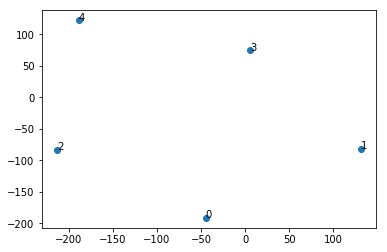

In [163]:
import matplotlib.pyplot as plt

x = []
y = []
n = []
for i in range(len(X_embedded)):
    x.append(X_embedded[i][0])
    y.append(X_embedded[i][1])
    n.append(i)

# colors = np.random.rand(4)
# area = (30 * np.random.rand(4))**2  # 0 to 15 point radii

fig, ax = plt.subplots()
ax.scatter(y, x)
for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], x[i]))
# ax.show()


## Question 2

### Data Processing

In [164]:
## ----------------------- Part 2 -----------------------------------

data2 = []
with open('IR-assignment-3-data.txt') as f:
    for line in f:
        data2.append(line)
        
data_qid4 = []
for i in range(len(data2)):
    if data2[i].split()[1] == 'qid:4':
        data_qid4.append(data2[i])

In [178]:
float(data_qid4[0].split()[76].split(':')[1])

90.53171

### Extracting values for qid:4

In [202]:
rel_ground = {}
nonrel_ground = {}

tfidf_val = []
grnd_label = []

tf_rel_dic = {}
unique_dic = {}

for i in range(len(data_qid4)):
    grel = int(data_qid4[i].split()[0])
    tfval = float(data_qid4[i].split()[76].split(':')[1])
    tfidf_val.append(tfval)
    grnd_label.append(grel)
    tf_rel_dic[i] = tfval
    unique_dic[tfval] = grel
    if grel == 0:
        nonrel_ground[i] = tfval
    else:
        rel_ground[i] = tfval

In [203]:
len(tfidf_val)

103

### Getting Precision and Recall - Method 1

In [236]:
sorted_results = sorted(tf_rel_dic.items(), key=operator.itemgetter(1),reverse=True)

kval = []
precisionval = []
recallval = []
for i in range(1,len(sorted_results)+1):
    topk = sorted_results[:i]
    restk = sorted_results[i:]
    kval.append(i)
    tp=fp=fn=0
    for j in range(len(topk)):
        indx = topk[j][0]
        grnd_rel_val = grnd_label[indx]
        if grnd_rel_val>0:
            tp+=1
        else:
            fp+=1
    for j in range(len(restk)):
        indx = restk[j][0]
        grnd_rel_val = grnd_label[indx]
        if grnd_rel_val>0:
            fn+=1
    print i, tp, fp, fn
    precision_val = (tp*1.0)/(tp+fp)
    recall_val = (tp*1.0)/(tp+fn)
    precisionval.append(precision_val)
    recallval.append(recall_val)
    

1 0 1 44
2 0 2 44
3 0 3 44
4 0 4 44
5 1 4 43
6 1 5 43
7 2 5 42
8 3 5 41
9 3 6 41
10 4 6 40
11 4 7 40
12 5 7 39
13 6 7 38
14 7 7 37
15 8 7 36
16 9 7 35
17 9 8 35
18 10 8 34
19 10 9 34
20 11 9 33
21 11 10 33
22 12 10 32
23 12 11 32
24 13 11 31
25 14 11 30
26 15 11 29
27 15 12 29
28 15 13 29
29 15 14 29
30 15 15 29
31 15 16 29
32 16 16 28
33 16 17 28
34 17 17 27
35 17 18 27
36 17 19 27
37 18 19 26
38 19 19 25
39 19 20 25
40 20 20 24
41 21 20 23
42 22 20 22
43 22 21 22
44 22 22 22
45 22 23 22
46 22 24 22
47 23 24 21
48 23 25 21
49 24 25 20
50 24 26 20
51 25 26 19
52 26 26 18
53 26 27 18
54 27 27 17
55 28 27 16
56 28 28 16
57 29 28 15
58 30 28 14
59 30 29 14
60 31 29 13
61 31 30 13
62 31 31 13
63 32 31 12
64 32 32 12
65 32 33 12
66 32 34 12
67 33 34 11
68 33 35 11
69 34 35 10
70 34 36 10
71 35 36 9
72 35 37 9
73 36 37 8
74 36 38 8
75 37 38 7
76 37 39 7
77 37 40 7
78 38 40 6
79 39 40 5
80 40 40 4
81 40 41 4
82 41 41 3
83 41 42 3
84 41 43 3
85 41 44 3
86 41 45 3
87 41 46 3
88 41 47 3
89 41 48

In [237]:
for i in range(len(precisionval)):
    print kval[i],precisionval[i],recallval[i]

1 0.0 0.0
2 0.0 0.0
3 0.0 0.0
4 0.0 0.0
5 0.2 0.0227272727273
6 0.166666666667 0.0227272727273
7 0.285714285714 0.0454545454545
8 0.375 0.0681818181818
9 0.333333333333 0.0681818181818
10 0.4 0.0909090909091
11 0.363636363636 0.0909090909091
12 0.416666666667 0.113636363636
13 0.461538461538 0.136363636364
14 0.5 0.159090909091
15 0.533333333333 0.181818181818
16 0.5625 0.204545454545
17 0.529411764706 0.204545454545
18 0.555555555556 0.227272727273
19 0.526315789474 0.227272727273
20 0.55 0.25
21 0.52380952381 0.25
22 0.545454545455 0.272727272727
23 0.521739130435 0.272727272727
24 0.541666666667 0.295454545455
25 0.56 0.318181818182
26 0.576923076923 0.340909090909
27 0.555555555556 0.340909090909
28 0.535714285714 0.340909090909
29 0.51724137931 0.340909090909
30 0.5 0.340909090909
31 0.483870967742 0.340909090909
32 0.5 0.363636363636
33 0.484848484848 0.363636363636
34 0.5 0.386363636364
35 0.485714285714 0.386363636364
36 0.472222222222 0.386363636364
37 0.486486486486 0.4090909

### Ploting PR Curve with Interpolation


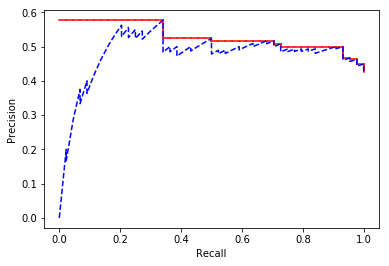

In [276]:
import numpy as np
import matplotlib.pyplot as plt

#just a dummy sample
recall=np.array(recallval)
checkloop = 0
precision=np.array(precisionval)
i=len(recallval)-2

# interpolation...
while i>=0:
    upval = precision[i+1]
    lowval = precision[i]
    flag=0
    if upval<=lowval:
        flag+=1
    else:
        precision[i]=precision[i+1]
    i=i-1

# plotting...
fig, ax = plt.subplots()
loopval = len(recallval)-1
for i in range(loopval):
    rec1 = recall[i]
    recp = recall[i+1]
    pre1 = precision[i]
    prep = precision[i+1]
    ax.plot((rec1,rec1),(pre1,prep),'k-',label='',color='red') #vertical
    checkloop+=1
    ax.plot((rec1,recp),(prep,prep),'k-',label='',color='red') #horizontal

precision2=np.array(precisionval).copy()
ax.plot(recall,precision2,'k--',color='blue')
#ax.legend()
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
# plt.savefig('fig.jpg')
fig.show()

### Getting Precision and Recall - Method 2

In [250]:
sorted_results = sorted(tf_rel_dic.items(), key=operator.itemgetter(1),reverse=True)

total_relevant = 0
for i in range(len(sorted_results)):
    if grnd_label[sorted_results[i][0]]>0:
        total_relevant+=1

# print total_relevant

kval = []
precisionval = []
recallval = []
for i in range(1,len(sorted_results)+1):
    total_retrieved = i
    topk = sorted_results[:i]
#     restk = sorted_results[i:]
    kval.append(i)
    tp = 0
    for j in range(len(topk)):
        indx = topk[j][0]
        grnd_rel_val = grnd_label[indx]
        if grnd_rel_val>0:
            tp+=1
    precision_val = (tp*1.0)/(total_retrieved)
    recall_val = (tp*1.0)/(total_relevant)
    precisionval.append(precision_val)
    recallval.append(recall_val)

In [251]:
for i in range(len(precisionval)):
    print kval[i],precisionval[i],recallval[i]

1 0.0 0.0
2 0.0 0.0
3 0.0 0.0
4 0.0 0.0
5 0.2 0.0227272727273
6 0.166666666667 0.0227272727273
7 0.285714285714 0.0454545454545
8 0.375 0.0681818181818
9 0.333333333333 0.0681818181818
10 0.4 0.0909090909091
11 0.363636363636 0.0909090909091
12 0.416666666667 0.113636363636
13 0.461538461538 0.136363636364
14 0.5 0.159090909091
15 0.533333333333 0.181818181818
16 0.5625 0.204545454545
17 0.529411764706 0.204545454545
18 0.555555555556 0.227272727273
19 0.526315789474 0.227272727273
20 0.55 0.25
21 0.52380952381 0.25
22 0.545454545455 0.272727272727
23 0.521739130435 0.272727272727
24 0.541666666667 0.295454545455
25 0.56 0.318181818182
26 0.576923076923 0.340909090909
27 0.555555555556 0.340909090909
28 0.535714285714 0.340909090909
29 0.51724137931 0.340909090909
30 0.5 0.340909090909
31 0.483870967742 0.340909090909
32 0.5 0.363636363636
33 0.484848484848 0.363636363636
34 0.5 0.386363636364
35 0.485714285714 0.386363636364
36 0.472222222222 0.386363636364
37 0.486486486486 0.4090909

### Plotting PR Curve with Interpolation

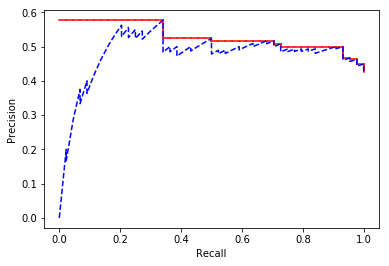

In [277]:
import numpy as np
import matplotlib.pyplot as plt

#just a dummy sample
recall=np.array(recallval)
checkloop = 0
precision=np.array(precisionval)
i=len(recallval)-2

# interpolation...
while i>=0:
    upval = precision[i+1]
    lowval = precision[i]
    flag=0
    if upval<=lowval:
        flag+=1
    else:
        precision[i]=precision[i+1]
    i=i-1

# plotting...
fig, ax = plt.subplots()
loopval = len(recallval)-1
for i in range(loopval):
    rec1 = recall[i]
    recp = recall[i+1]
    pre1 = precision[i]
    prep = precision[i+1]
    ax.plot((rec1,rec1),(pre1,prep),'k-',label='',color='red') #vertical
    checkloop+=1
    ax.plot((rec1,recp),(prep,prep),'k-',label='',color='red') #horizontal

precision2=np.array(precisionval).copy()
ax.plot(recall,precision2,'k--',color='blue')
#ax.legend()
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
# plt.savefig('fig.jpg')
fig.show()